# Sustainable Race Calendar for Formula 1

# Problem Background

The FIA governs the F1 motor racing sport, which is under increasing assessment due to its environmental impact, particularly the carbon emissions from the logistics of arranging multiple races across various continents. In 2019, the FIA committed to achieving zero carbon emissions by 2030, recognizing that 45% of the sport’s carbon footprint stems from logistics.


**Due to the free license's variable limit of 500, this project has been reduced from 24 to 22 stations.**


In [ ]:
pip install amplpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Modeling

# 1.   Calculation of Total Miles Traveled







In [ ]:
from haversine import haversine

race_tracks = {
    "Sakhir": (26.031, 50.512),
    "Jeddah": (21.632, 39.104),
    "Melbourne": (-37.846, 144.970),
    "Suzuka": (34.844, 136.534),
    "Shanghai": (31.340, 121.221),
    "Miami": (25.958, -80.239),
    "Imola": (44.341, 11.713),
    "Monaco": (43.737, 7.429),
    "Montreal": (45.506, -73.525),
    "Spielberg": (47.223, 14.761),
    "Silverstone": (52.072, -1.017),
    "Budapest": (47.583, 19.250),
    "Spa_Francorchamps": (50.436, 5.971),
    "Monza": (45.621, 9.290),
    "Baku": (40.369, 49.842),
    "Singapore": (1.291, 103.859),
    "Austin": (30.135, -97.633),
    "Mexico_City": (19.402, -99.091),
    "Sao_Paulo": (-23.702, -46.698),
    "Las_Vegas": (36.116, -115.168),
    "Lusail": (25.490, 51.454),
    "Yas_Marina": (24.471, 54.601)
}

sequence = ["Sakhir", "Jeddah", "Melbourne", "Suzuka", "Shanghai", "Miami",
                  "Imola", "Monaco", "Montreal", "Spielberg", "Silverstone", "Budapest", "Spa_Francorchamps",
                  "Monza", "Baku", "Singapore", "Austin", "Mexico_City", "Sao_Paulo",
                  "Las_Vegas", "Lusail", "Yas_Marina"]

distance = 0.0
for i in range(len(sequence) - 1):
    start = race_tracks[sequence[i]]
    end = race_tracks[sequence[i + 1]]
    distance += haversine(start, end, unit='mi')

print('The total distance is '+ str(distance) +' miles')

The total distance is 74713.64881926173 miles


With the data from Formula 1 website, we start with calculating the total miles traveled in the whole F1 journey. To calculate the total miles traveled for the 2024 F1 season, we utilized the Haversine formula, a mathematical formula used to calculate the shortest distance between two points on a sphere given their longitudes and latitudes. We extracted the coordinates for each race track and used the Haversine formula to calculate the distance between each pair of race tracks. By summing these distances, we obtained the total miles traveled for the entire duration of the 2024 season. This approach allowed for an accurate estimation of the total travel distance for teams and racers throughout the season, providing valuable insight into the logistical challenges and environmental impact of the F1 calendar. Thus, a final result is achieved that the total distance traveled in the current plan is 74713.64881926173 miles.

# 2.   Issue Visualization

To visually represent the F1 2024 calendar on a world map, we employed mapping software in Python to plot the coordinates of each race track. Using the longitude and latitude values, we marked the locations of the race tracks on the map. By connecting these points in the order of the race calendar, we created a route that visually displayed the sequence of races for the season. This approach provided a clear visualization of the geographical distribution of the race tracks and the overall route taken by teams and racers throughout the season. It also allowed for a qualitative assessment of the sustainability goals of the FIA, highlighting any potential areas for improvement in terms of travel distance and environmental impact. And we will start from the current graph to find the potential optimization solution in the following part of this report.

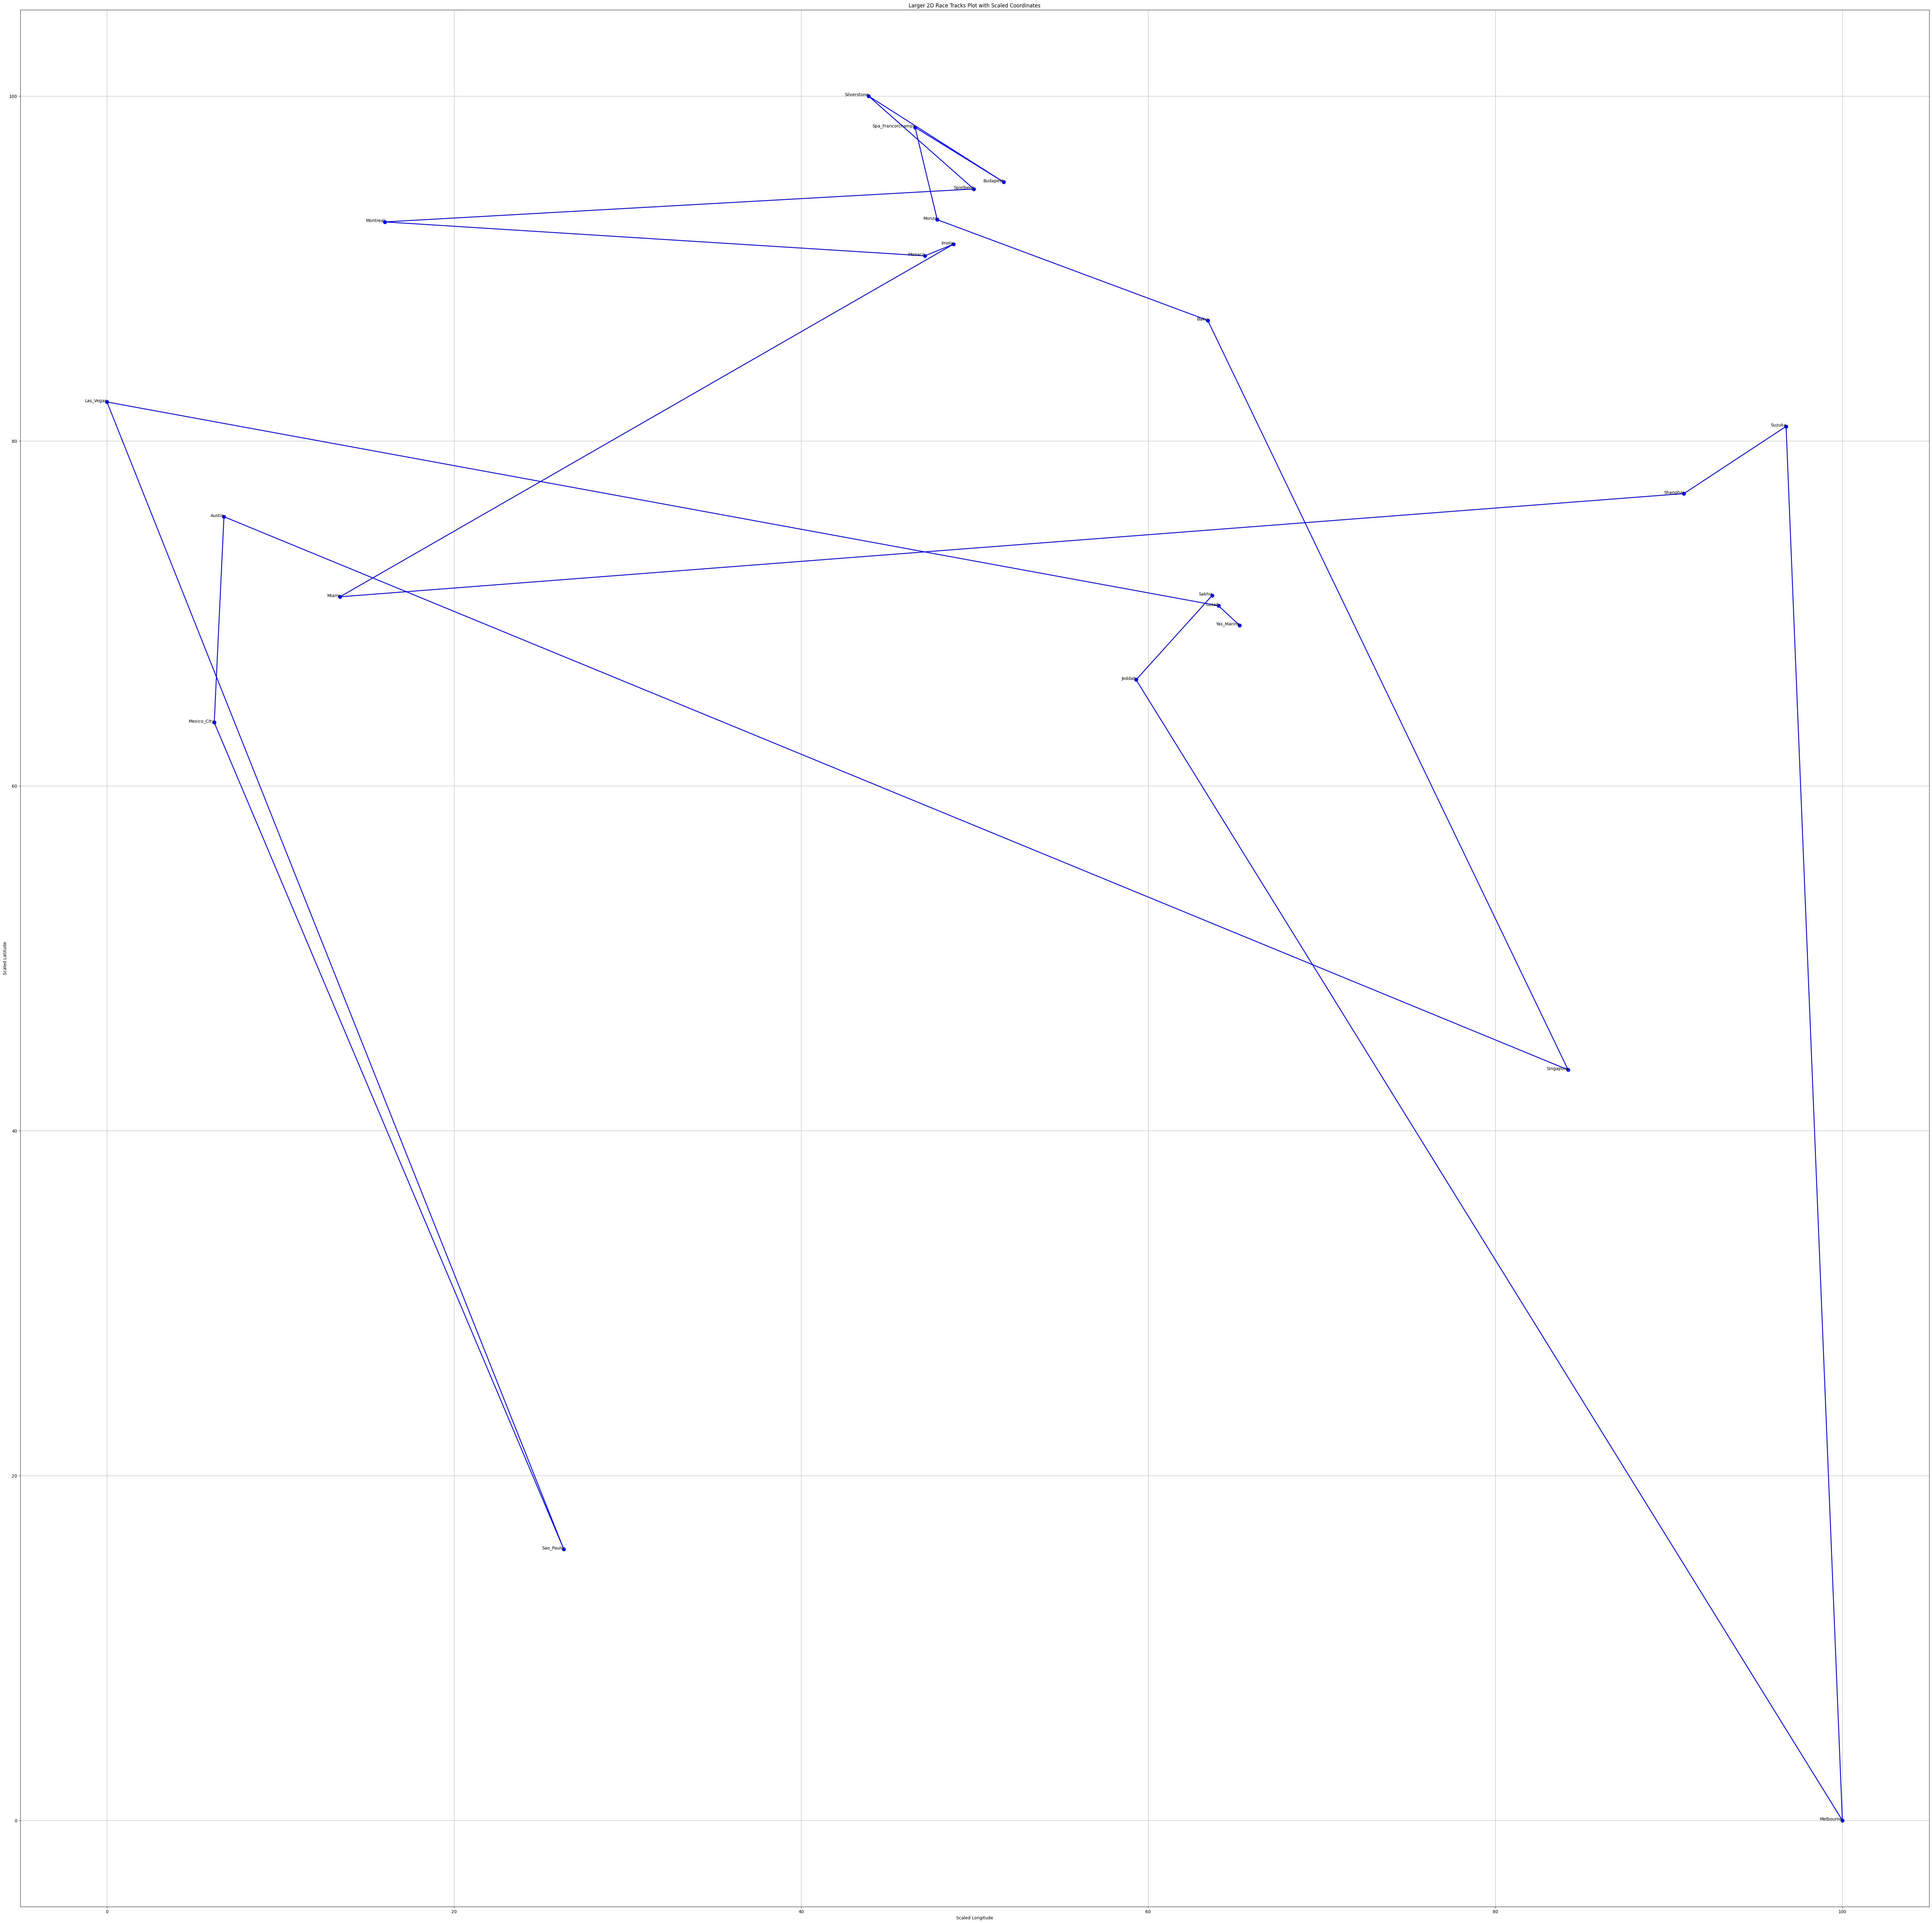

In [ ]:
lats = np.array([race_tracks[track][0] for track in sequence])
lons = np.array([race_tracks[track][1] for track in sequence])

# Normalize latitudes and longitudes for better spread on the plot
lats_scaled = (lats - np.min(lats)) / (np.max(lats) - np.min(lats)) * 100
lons_scaled = (lons - np.min(lons)) / (np.max(lons) - np.min(lons)) * 100

# Create a 2D scatter plot with a larger figure size
plt.figure(figsize=(80, 80))  # Increase the figure size to make it larger
plt.plot(lons_scaled, lats_scaled, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Annotate each race track on the 2D plot
for i, track in enumerate(sequence):
    plt.text(lons_scaled[i], lats_scaled[i], track, fontsize=10, ha='right')
plt.xlabel('Scaled Longitude')
plt.ylabel('Scaled Latitude')
plt.title('Larger 2D Race Tracks Plot with Scaled Coordinates')
plt.grid(True)
plt.show()



# 3.   Distance Matrix Construction
To create a distance matrix for the 2024 F1 season, we used the Haversine formula to calculate the distance between each pair of race tracks. By iterating through the list of race tracks and computing the distance between each pair, we constructed a symmetric matrix where each cell represented the distance between two race tracks. To ensure that the diagonal elements of the matrix (i.e., the distance from a race track to itself) were set to zero, we manually assigned these values. This distance matrix provided a comprehensive overview of the travel distances between all race tracks, facilitating the analysis of potential optimization strategies for minimizing total travel distance.

**See Project.dat**






# 4.   Historical Comparison and Optimization Possibilities in 1950




For the F1 season in 1950, there were 4 races, each at a different track: Silverstone, Spa-Francorchamps, Monza, and Monaco. The number of different ways these tracks can be ordered is a permutation of 4 tracks, calculated as:

    P(n)=4!=24


which means there are only 24 permutations. The best calendar with the minimum distance traveled for the inaugural season is: Silverstone -> Spa_Francorchamps -> Monza -> Monaco, the total distance is 847.77 miles.
For the F1 season in 2024, there were 22 races. The number of different ways these tracks can be ordered is a permutation of 22 tracks, calculated as:

    P(n)=22!=1124000727777607680000


 which means there are 1124000727777607680000 permutations, it would not be possible to permutate directly. Given the large number of permutations and the complex constraints of the real world, this approach is neither efficient nor effective.


In [ ]:
import itertools
from haversine import haversine

# Coordinates of the 1950 tracks (latitude, longitude)
tracks_1950 = {
    "Silverstone": (52.072, -1.017),
    "Spa_Francorchamps": (50.436, 5.971),
    "Monza": (45.621, 9.290),
    "Monaco": (43.737, 7.429)
}

# Calculate the total distance for a given race calendar
def calculate_total_distance(race_sequence):
    total_distance = 0.0
    for i in range(len(race_sequence) - 1):
        start = tracks_1950[race_sequence[i]]
        end = tracks_1950[race_sequence[i + 1]]
        total_distance += haversine(start, end, unit='mi')
    return total_distance

# Generate all possible calendars (permutations)
track_names = list(tracks_1950.keys())
all_calendars = list(itertools.permutations(track_names))

# Find the calendar with the minimum distance traveled
min_distance = float('inf')
best_calendar = None

for calendar in all_calendars:
    total_distance = calculate_total_distance(calendar)
    if total_distance < min_distance:
        min_distance = total_distance
        best_calendar = calendar

# Output using concatenation and format()
print("The best calendar is: " + str(best_calendar))
print("Minimum distance traveled: " + "{:.2f}".format(min_distance) + " miles")


The best calendar is: ('Silverstone', 'Spa_Francorchamps', 'Monza', 'Monaco')
Minimum distance traveled: 847.77 miles


# 5.   Heuristic Approach to Optimization for the 2024 F1 Season






Nearest Neighbor Heuristic Calendar:  ['Sakhir', 'Lusail', 'Yas_Marina', 'Jeddah', 'Baku', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Spa_Francorchamps', 'Silverstone', 'Montreal', 'Miami', 'Austin', 'Mexico_City', 'Las_Vegas', 'Suzuka', 'Shanghai', 'Singapore', 'Melbourne', 'Sao_Paulo']
Total Distance Traveled:  34689.9429661484  miles


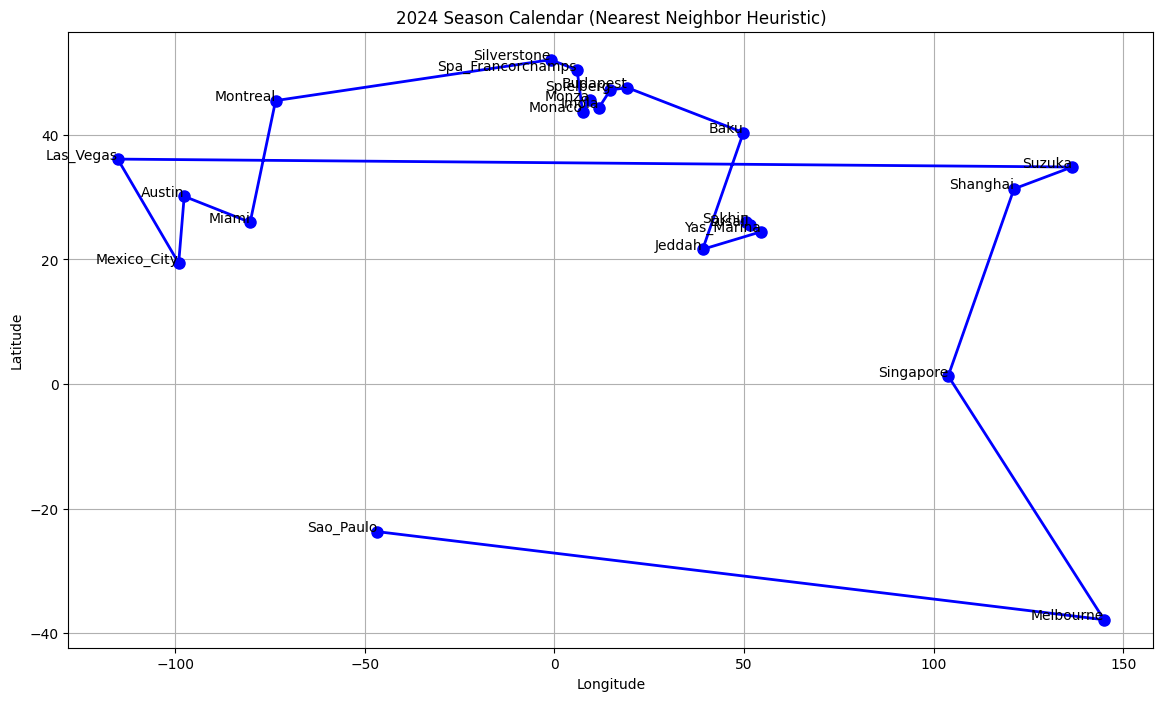

In [ ]:
# Nearest Neighbor Heuristic Algorithm
def nearest_neighbor_heuristic(start_track, tracks):
    unvisited_tracks = tracks.copy()
    current_track = start_track
    race_calendar = [current_track]
    unvisited_tracks.pop(current_track)
    total_distance = 0.0

    while unvisited_tracks:
        nearest_track = None
        nearest_distance = float('inf')
        for track, coordinates in unvisited_tracks.items():
            distance = haversine(tracks[current_track], coordinates, unit='mi')
            if distance < nearest_distance:
                nearest_distance = distance
                nearest_track = track
        race_calendar.append(nearest_track)
        total_distance += nearest_distance
        current_track = nearest_track
        unvisited_tracks.pop(current_track)

    return race_calendar, total_distance

# Start the season at Bahrain (Sakhir)
start_track = "Sakhir"
calendar_2024, total_distance_2024 = nearest_neighbor_heuristic(start_track, race_tracks)

# Output the race calendar and total distance
print("Nearest Neighbor Heuristic Calendar: ", calendar_2024)
print("Total Distance Traveled: ", total_distance_2024, " miles")

# Plot the race calendar on a 2D map
def plot_calendar(calendar, tracks):
    lats = [tracks[track][0] for track in calendar]
    lons = [tracks[track][1] for track in calendar]

    plt.figure(figsize=(14, 8))
    plt.plot(lons, lats, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

    for i, track in enumerate(calendar):
        plt.text(lons[i], lats[i], track, fontsize=10, ha='right')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('2024 Season Calendar (Nearest Neighbor Heuristic)')
    plt.grid(True)
    plt.show()

plot_calendar(calendar_2024, race_tracks)

The nearest neighbor heuristic significantly reduced the travel distance for the 2024 season by about 53.6%, highlighting inefficiencies in the original race calendar, particularly in how it greatly reduced the unnecessary and repeated intercontinental travel. While this approach effectively minimizes travel distance, this approach is greedy, meaning it is focusing only on the closest next option, which can lead to suboptimal overall sequences potentially overlooking better long-term routing options.




# 6.   Integer Programming for Optimization for the 2024 F1 Season



To minimize the total distance traveled for the entire 2024 F1 season, an integer programming problem can be formulated based on the Traveling Salesman Problem (TSP). In this context, the race tracks represent the cities to be visited, and the goal is to find the shortest possible route that visits each track exactly once and returns to the starting track. With this in mind, we get inspired by the class and discussion’s approach for optimization of the shortest path.

We will thus define the decision variables of  $x_{ij}$ and $d_{ij}$ as below, with i,j = 1, 2, 3…22 for the orders

Let $x_{ij}$ be a binary decision variable where:

$$
x_{ij} =
\begin{cases}
1 & \text{if arc } (i,j) \text{ is on the shortest path}, \\
0 & \text{otherwise}.
\end{cases}
$$

Here, $d_{ij}$ represents the distance between city \( i \) and city \( j \).


With our objective is to minimize the total distance traveled while the constraints ensure that each track is visited exactly once and that the route forms a closed loop, we will write the Integer Programming function as below:

$$
\text{Minimize } \quad \sum_{(i,j)\in A} d_{ij} \cdot x_{ij}
$$

$$
\text{subject to:}
$$

$$
\sum_{(s,i)\in A} X_{si} = 1 \quad , \quad \text{for each city } i, \text{ there must be exactly one incoming arc.}
$$

$$
\sum_{(j,t)\in A} X_{jt} = 1 \quad , \quad \text{for each city } j, \text{ there must be exactly one outgoing arc.}
$$

$$
\sum_{(i,k)\in A} X_{ik} - \sum_{(j,i)\in A} X_{ji} = 0 \quad \forall i \notin \{s,t\}
$$


In addition to the two constraints above, we need to ensure the route forms a single closed loop and thus we should define another bundle of variables to eliminate subtours. Define integer variable ui as the position in the tour for city i, which is ≥ 1. Then we are able to add the constraint to the optimization problem:


$$
u_i - u_j + 22 \cdot x_{ij} \leq 21 \quad \forall i,j \in \{1, 2, \dots, 22\}, \, i \neq j
$$


The final constraint means that decision variables $x_{ij}$ are binary, taking values of either 0 or 1, indicating whether there is a route between cities i and j.


$$
x_{ij} \in \{0, 1\} \quad \text{for all } i, j = 1, 2, \dots, 22
$$


With the above formulas, we will input them into the AMPL format to run the optimization solution in this case.

  
  AMPL turns out to provide the optimal objective value as 38208.23 with the closed loop of
  
  1 - 21 - 22 - 15 - 4 - 5 - 16 - 3 - 19 - 6 - 18 - 17 - 20 - 9 - 11 - 13 - 14 - 8 - 7 - 10 - 12 - 2 - 1
  
  , which reduces the total distance traveled by 48.9%. **(Using project_q6.mod)**




# 7.   Adding constraints to improve the model




i) Due to fierce winter conditions in Canada, the Montreal race must happen after round 8.


ii) Due to the monsoon season in Singapore, the Singapore race must happen between R1-R7 or
R18-R22.


iii) Due to broadcasting incentives, the races in the same countries cannot be at adjacent/consecutive
rounds to maximize viewership.


iv) Due to contractual obligations, the race in Bahrain must be the first race of the season and the
race in UAE must be the last race of the season.


v) The races in Suzuka and Shangai must be consecutive. Either one of them can follow the other.


vi) If the Monaco race happens in the first half of the season, i.e. (R1-R11), then the Sao Paulo race
must be in the second half of the season, i.e. (R12-R22).


vii) Either the Jeddah or Lusail race must be in the first half of the season, i.e. (R1-R11)

In this section, we will update our race scheduling formulation to incorporate the additional constraints provided by the FIA. These constraints include limitations due to sponsorship deals, contracts with tracks, and weather conditions. We will then use AMPL to obtain a new race calendar for 2024 that satisfies these constraints. Finally, we will evaluate the new solution compared to the optimal solution obtained previously.




 **1.   Montreal Race Timing**




Due to the winter condition in Montreal, the Montreal race (whose corresponding is 9) must happen after round 8. We can represent this constraint as:
$$
u[9] \geq 8
$$




**2.   Singapore Race Timing**

Due to the Moon Season in Singapore, the Singapore race(16) must happen between R1-R7 or R18-R22. We will first need to define a new binary variable $y_{\text{Singapore}}$ as below:

Singapore race scheduled between rounds:
$$
\begin{cases}
1-7, & \text{if } y_{\text{Singapore}} = 1 \\
18-22, & \text{if } y_{\text{Singapore}} = 0
\end{cases}
$$


We will add two more constraints to ensure that the Singapore race is scheduled within the specified rounds to avoid the monsoon season.

$$
u[16] \leq 7 + 22 \times y_{\text{Singapore}}
$$

$$
u[16] \geq 7 + 22 \times (1 - y_{\text{Singapore}})
$$




**3.  Broadcasting Incentives**

As this constraint asks for the races in the same countries to be adjacent/consecutive, races at sites 6, 17, and 20 (they are all in the USA) cannot be consecutive. So for all the combinations of {6, 17, 20}, $$x_{ij}$$ should be 0. As a result, we will add constraints as below:

$$
x_{ij} = 0 \quad \text{for} \quad (i,j) \in \{ (6, 17), (17, 6), (17, 20), (20, 17), (6, 20), (20, 6) \}
$$



**4. Contractual Obligations**

Due to contractual obligations, the race in Bahrain (1) must be the first race of the season, and the race in UAE (22) must be the last race of the season. Thus, the order of Bahrain should be 1 and that of the UAE race must be 22. As a result, we will add two corresponding constraints:

$$
u[1] = 1
$$

$$
u[22] = 22
$$



**5. Consecutive Suzuka and Shanghai Races**

As the races in Suzuka (4) and Shanghai (5) must be consecutive, we will also add one more corresponding constraint:

$$
x_{45} + x_{54} = 1
$$



**6. Monaco and Sao Paulo Race Timing**

It is required that if the Monaco (8) race happens in the first half of the season, then the Sao Paulo (19) race must be in the second half of the season. We will first need to define a new binary variable $$y_{\text{half}}$$ as below:

$$
y_{\text{half}} =
\begin{cases}
0, & \text{if the race is in the first half} \\
1, & \text{otherwise}
\end{cases}
$$

We will add four more constraints to ensure this requirement:

$$
u[8] \leq 11 + 22 \times y_{\text{half}}
$$

$$
u[8] \geq 1 - 22 \times (1 - y_{\text{half}})
$$

$$
u[19] \leq 1 + 22 \times (1 - y_{\text{half}})
$$

$$
u[19] \geq 11 - 22 \times y_{\text{half}}
$$


 **7. Jeddah or Lusail Race**

As either Jeddah (2) or Lusail (21) race must be in the first half of the season, we will first add two more variables:

$$
y_{\text{Jeddah}} =
\begin{cases}
1, & \text{if the Jeddah race is in the first half} \\
0, & \text{otherwise}
\end{cases}
$$

$$
y_{\text{Lusail}} =
\begin{cases}
1, & \text{if the Lusail race is in the first half} \\
0, & \text{otherwise}
\end{cases}
$$

With these two variables, we will add constraints to make sure that there is one and only one of the Jeddah or Lusail races in the first half:

$$
u[21] \leq 11 + 22 \times y_{\text{Lusail}}
$$

$$
u[2] \leq 11 + 22 \times y_{\text{Jeddah}}
$$

$$
y_{\text{Jeddah}} + y_{\text{Lusail}} = 1
$$


We will use the updated formulation with the new constraints in AMPL **(Using project_q7.mod)** to obtain a new race calendar for 2024 and generate a new objective value of 40143.39 along with the close loop of  1 - 21 - 2 - 15 - 12 - 10 - 7 - 8 - 14 - 13 - 11 - 19 - 6 - 9 - 17 - 18 - 20 - 4 - 5 - 3 - 16 - 22 - 1, and this reduces the total distance traveled by 46.27%




# 8.   Discussion on Assumptions and Model Improvements




Throughout this project, several assumptions with respect to edge weights and symmetry in traveling have been made that do not reflect the real-life situation exactly.

When solving the traveling salesman problem, we used the straight-line distance between each of the two countries to formulate the distance matrix. In real life, there are curvatures of the track, elevation changes, and the presence of obstacles while traveling but we didn’t take these into consideration. For example, airplanes from the US west coast to China never fly over the Pacific Ocean. Additionally, in the distance matrix, we assumed by default that it is the same to travel from location A to B as travel from B to A, which can be considered as the symmetry in traveling. Thus, there could be a corresponding strategy to improve the model. For example, we should research and collect data on flight paths taken by airlines for specific routes and calculate the exact distance traveled to compute a more accurate distance matrix.

Secondly, we acknowledged that participants based in the same country may not require transportation. We noted that accounting for participants’ home countries and their respective transportation modes, such as those based in Spain who may not require transportation, is crucial for further enhancing the accuracy of our model. To refine our model, we suggested collecting data on the home countries and the preferred transportation methods of participants.


Moreover, our model does not account for variables such as travel time, fuel consumption, or the cost associated with traveling, which can vary depending on the mode of transport used, the efficiency of the vehicle, and local infrastructure. These factors can heavily influence the optimal path and should ideally be incorporated into a more comprehensive model.


Another assumption we did not consider in our model is the use of other land transportation, such as trains, for travel across the Eurasian continent. To better simulate reality, we need to take this into account. Thus, another optimization should be conducted to determine whether it is a better alternative to use other types of transportation. As a result, we may replace the distance matrix with a carbon footprint matrix for a more accurate estimate.


After reviewing the newly composted route for the 2024 race, we realized that our assumptions did not take into account external factors such as political stability(warzones), weather conditions, or seasonal variations, which can severely impact the feasibility and safety of travel routes. Incorporating real-time data feeds and predictive modeling to adjust routes in response to these factors could greatly enhance the model's applicability and accuracy.


# **Conclusion**

This report presents a comprehensive analysis and optimization of the F1 (Formula 1) 2024 race calendar, aimed at minimizing the total travel distance and thereby reducing the carbon footprint associated with the logistical aspects of the season. Our findings reveal that the current scheduling results in extensive travel distances, contributing significantly to the sport's environmental impact. Through the application of mathematical modeling and geographical optimization, we propose a revised calendar that significantly reduces travel by 46.27% compared to the initial schedule and simultaneously satisfies the limitations with respect to sponsorship deals, contracts with tracks, and weather conditions. This reduction not only aligns with the FIA's sustainability goals set for 2030 but also presents an approach to address the criticisms related to the environmental impact of race scheduling.